蒙特卡洛模拟的例子：求𝛑值

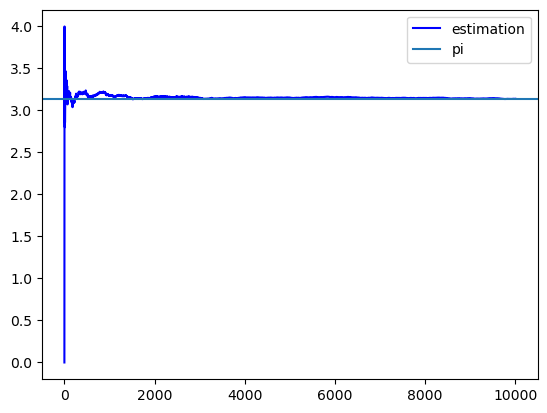

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

n = 10000
r0 = 1
seed = 42
xr = np.zeros(n)
yr = np.zeros(n)
pi = np.zeros(n)
count = np.arange(0, n, 1)

random.seed(seed)
m = 0

for i in range(1, n):
    xr[i] = (2*random.random() - 1) * r0
    yr[i] = (2*random.random() - 1) * r0
    r2 = xr[i] ** 2 + yr[i] ** 2

    if r2 < r0 ** 2:
        m += 1
    pi[i] = 4 * m / i

plt.plot(count, pi, 'b-', label='estimation')
plt.axhline(math.pi, label='pi')
plt.legend()
plt.show()



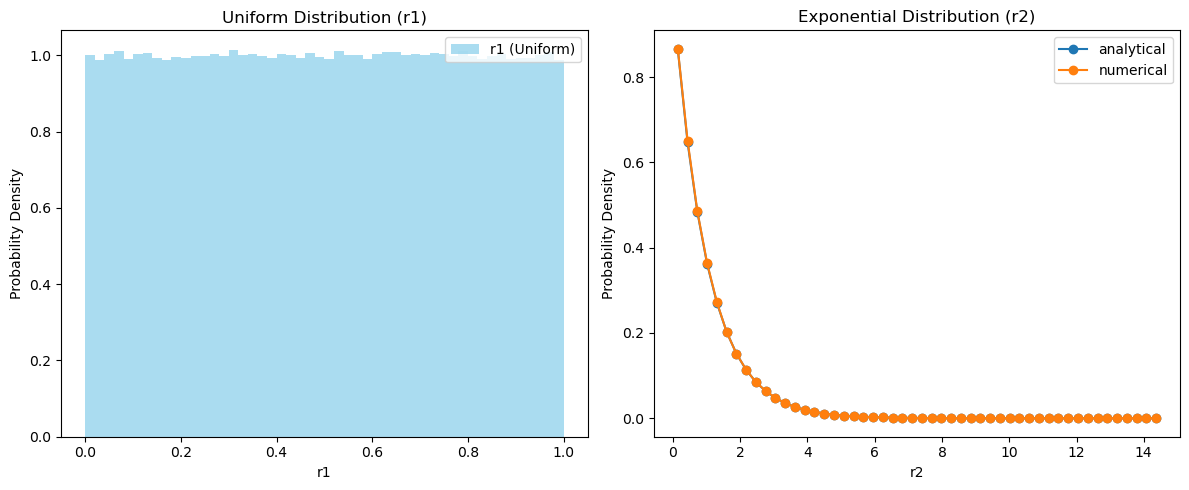

In [16]:
#验证生成随机数的反函数法
import numpy as np
import matplotlib.pyplot as plt
import random

nmax = 1000000
seed = 42
r1 = np.zeros(nmax)
r2 = np.zeros(nmax)
random.seed(seed)
m = 0

for i in range(nmax):
    r1[i] = random.random()
    r2[i] = -np.log(r1[i])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 画r1的直方图（均匀分布）
axs[0].hist(r1, bins=50, density=True, alpha=0.7, color='skyblue', label='r1 (Uniform)')
axs[0].set_title('Uniform Distribution (r1)')
axs[0].set_xlabel('r1')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 画r2的直方图（指数分布）和理论曲线
hist, x_edge = np.histogram(r2, bins=50)
bin_width = x_edge[1] - x_edge[0]
prob = hist / float(len(r2)) / bin_width
x = 0.5 * (x_edge[0:-1] + x_edge[1:])
pf = np.exp(-x)

axs[1].plot(x, pf, 'o-', label='analytical')
axs[1].plot(x, prob, 'o-', label='numerical')
axs[1].set_title('Exponential Distribution (r2)')
axs[1].set_xlabel('r2')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.tight_layout()
plt.show()

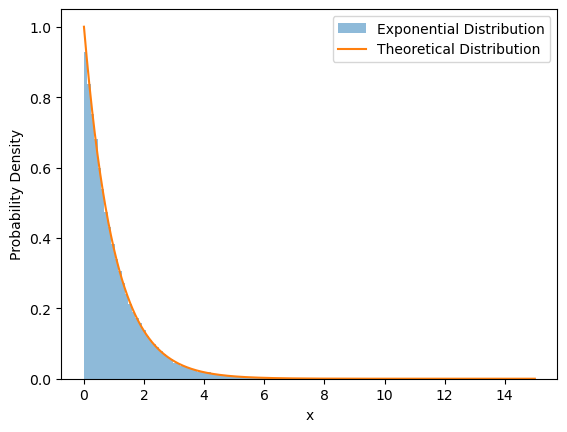

In [20]:
#舍选法
import numpy as np
import pylab as pl
import random

nmax = 1000000
seed = 42
lamda = 1
r_exp = []
random.seed(seed)

a = 0
b = 15
for i in range(nmax):
    r1 = a + (b-a)*random.random()
    r2 = random.random()
    if r2 < np.exp(-lamda*r1):
        r_exp.append(r1)

pl.hist(r_exp, bins=100, density=True, alpha=0.5, label='Exponential Distribution')
x = np.linspace(0, 15, 1000)
y = np.exp(-lamda*x)
pl.plot(x, y, label='Theoretical Distribution')
pl.xlabel('x')
pl.ylabel('Probability Density')
pl.legend()
pl.show()



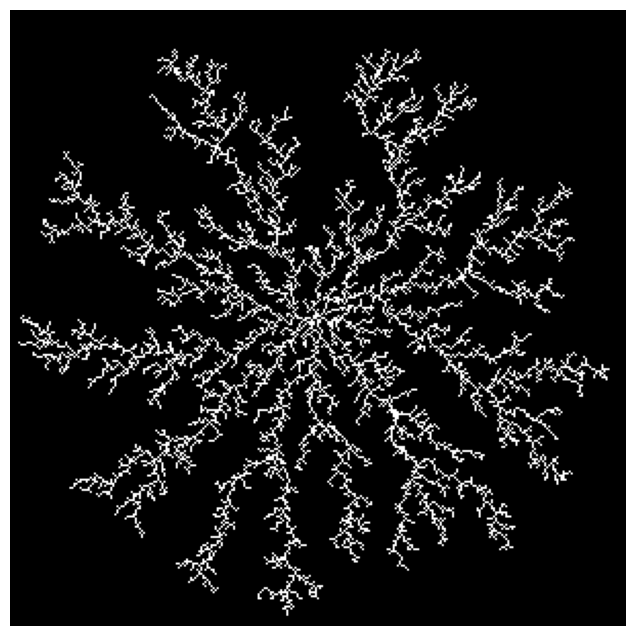

In [ ]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import math

nx = 300
ny = 300
occupy = np.zeros((nx+1, ny+1))
nstep = 300
xsource = int((nx - 1) / 2)
ysource = int((ny - 1) / 2)
occupy[xsource, xsource] = 1
rmax = min(xsource, ysource) - 1
xagg = []
yagg = []
ragg = []
r0 = 1

while r0 < rmax:
    theta = random.random() * 2 * math.pi
    x = xsource + int(r0 * np.cos(theta))
    y = ysource + int(r0 * np.sin(theta))
    for step in range(nstep):
        r1 = random.random()
        r2 = random.random()
        if r1 > 0.5:
            x += 1
        else:
            x -= 1
        if r2 > 0.5:
            y += 1
        else:
            y -= 1

        if x < 0 or x > nx - 1 or y < 0 or y > ny - 1:
            break

        if occupy[x-1, y] + occupy[x+1, y] + occupy[x, y+1] + occupy[x, y-1] + occupy[x-1, y-1] + occupy[x-1, y+1] + occupy[x+1, y-1] + occupy[x+1, y+1] >= 1:
            r = np.sqrt((x-xsource) ** 2 + (y-ysource) ** 2)
            if r > r0:
                r0=r
            
            xagg.append(x)
            yagg.append(y)
            ragg.append(r)
            occupy[x, y] = 1
            break


#画出分形
plt.figure(figsize=(8, 8))
plt.imshow(occupy, cmap='gray')
plt.axis('off')
plt.show()



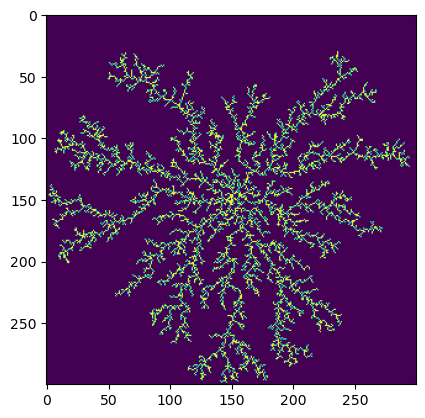

In [120]:
#二维扩散受限聚集
import numpy as np
import random
import math
import matplotlib.pyplot as plt

nx, ny = 300, 300
occupy = np.zeros([nx, ny])
xsource, ysource = int(nx//2), int(ny//2)
occupy[xsource, ysource] = 1 #中心为种子
rmax = min(xsource, ysource) - 1 #最大半径，防止粒子跑出边界
nstep = 300

xagg, yagg, ragg = [], [], [] #聚集的粒子坐标列表
r0 = 1 #新粒子的起始半径

while r0 < rmax:
    theta = random.uniform(0, 2*math.pi)
    x = xsource + int(r0 * math.cos(theta))
    y = ysource + int(r0 * math.sin(theta))

    for step in range(nstep):
        r1 = random.random()
        r2 = random.random()
        if r1 > 0.5:
            x += 1
        else:
            x -= 1
        if r2 > 0.5:
            y += 1
        else:
            y -= 1
        
        if x < 1 or x > nx -2 or y < 1 or y > ny - 2:
            break
        if np.sum(occupy[x-1:x+2, y-1:y+2]) > 0:
            r = np.sqrt((x-xsource)**2 + (y-ysource)**2)
            r0 = max(r0, r)

            xagg.append(x)
            yagg.append(y)
            ragg.append(r)
            occupy[x, y] = 1
            break

    
plt.imshow(occupy)
plt.show()





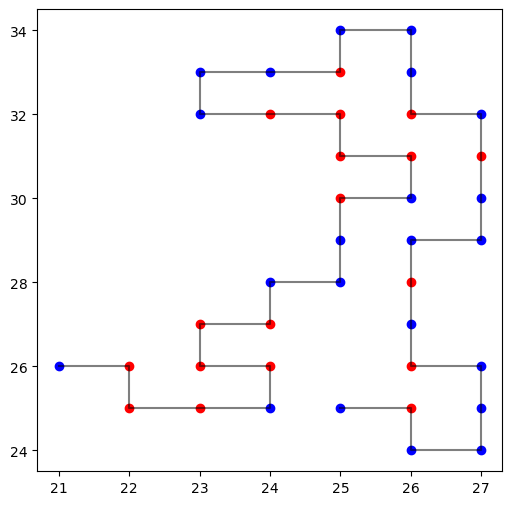

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import random

nwalk = 5000

nlength = 50
seq = 'PHPPPPHPHPPPHPHPPPHPPPHHHHPHPPPHHHHPHHHP'
nres = len(seq) #长度

resid_H = [i for i in range(len(seq)) if seq[i] == 'H']
resid_P = [i for i in range(len(seq)) if seq[i] == 'P']

econ = np.zeros((nres, nres))
for i in range(nres):
    for j in range(nres):
        if seq[i] == 'H' and seq[j] == 'H':
            econ[i, j] = -1
        elif seq[i] == 'P' and seq[j] == 'P':
            econ[i, j] = 0.5
        else:
            econ[i, j] = 0

xchain = np.zeros((nwalk, nres))
ychain = np.zeros((nwalk, nres))
energy = np.zeros(nwalk)

for walk in range(nwalk):
    occupy = np.zeros([nlength, nlength])
    x, y = nlength // 2, nlength // 2
    xseq = [x]
    yseq = [y]
    occupy[x, y] = 1
    success = True

    #随机游走
    for res in range(1, nres): #第一步已经走出:在25,25
        moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        random.shuffle(moves)
        found = False
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            # Check boundaries before accessing occupy[nx, ny]
            if 0 <= nx < nlength and 0 <= ny < nlength and occupy[nx, ny] == 0:
                found = True
                occupy[nx, ny] = 1
                x, y = nx, ny
                xseq.append(x)
                yseq.append(y)
                break

        if not found:
            success = False
            break
    if success:
        e = 0
        for i in range(nres-3):
            for j in range(i+3, nres):
                delta_x = abs(xseq[i] - xseq[j])
                delta_y = abs(yseq[i] - yseq[j])

                if (delta_x == 1 and delta_y == 0) or (delta_x == 0 and delta_y == 1):
                    e += econ[i, j]
                
        xchain[walk, :] = xseq
        ychain[walk, :] = yseq
        energy[walk] = e


min_inx = np.argmin(energy)
min_x = xchain[min_inx, :]
min_y = ychain[min_inx, :]

plt.figure(figsize = (6, 6))
for i in range(nres):
    if seq[i] == 'H':
        plt.plot(min_x[i], min_y[i], 'ro')
    else:
        plt.plot(min_x[i], min_y[i], 'bo')
plt.plot(min_x, min_y, 'k-', alpha=0.5)
plt.show()





    

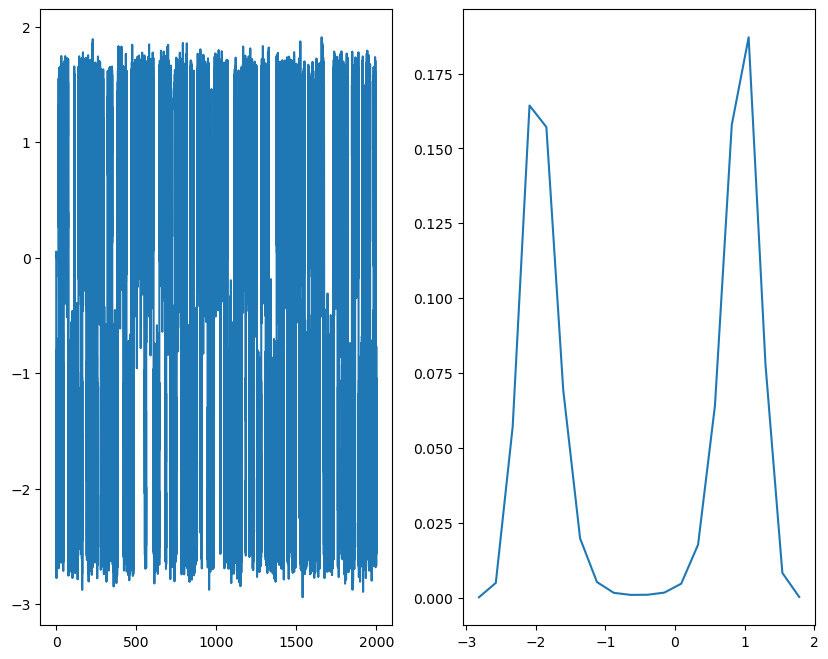

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import random

nx = 1000
nt = 2000000
dx = 0.1
dt = 0.001
x0 = -5
ksai = 0.1
Temp = 0.9
K = 1
xx = np.arange(x0, x0+nx*dx, dx)
time = np.arange(0, nt*dt, dt)
u = np.zeros(nx)

for i in range(nx):
    x = xx[i]
    u[i] = K*(x-1)**2*(x+2)**2

xt = np.zeros(nt)
energy = np.zeros(nt)
energy[0] = K * (xt[0] - 1) ** 2 * (xt[0] + 2) ** 2

for it in range(nt-1):
    fx = -2*K*(xt[it]-1)*(xt[it]+2)*(2*xt[it]+1)
    rnormal = random.gauss(0, 1)
    fB = np.sqrt(2*Temp/(ksai*dt)) * rnormal
    xt[it+1] = xt[it] + 1/ksai*fx*dt + fB*dt
    energy[it+1] = K*(xt[it+1]-1)**2*(xt[it+1]+2)**2

hist, xedge = np.histogram(xt, bins = 20)
prob = hist/float(len(xt))
x = 0.5*(xedge[0:-1] + xedge[1:])
fig = pl.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(time, xt)
ax2.plot(x, prob)
pl.show()

分子马达：周期性势场下的朗之万方程

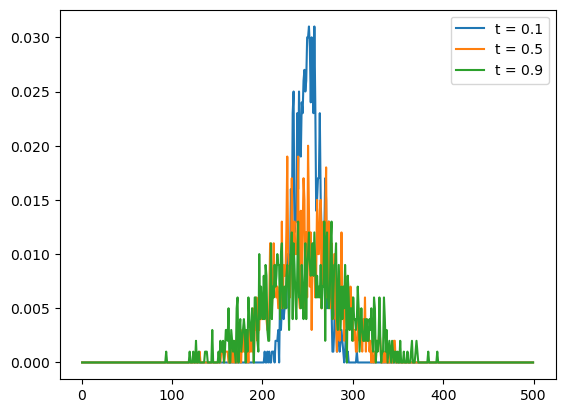

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import random

nwalker = 1000
nx = 500
nt = 50000
dx = 0.1
dt = 0.002
x0 = nx/2
ksai = 0.1
Temp = 1.2
xx = np.arange(0, nx*dx, dx)
time = np.arange(0, nt*dt, dt)

xt = np.zeros(nt)

n_record = 10
x_record = np.zeros((n_record+1, nwalker))
prob = np.zeros((n_record+1, nx))

def v(x):
    if x-6*int(x/6) <= 1:
        return 5*(x - 6*int(x/6))
    else:
        return -(x - 6*int((x+6)/6))

u = [v(x) for x in xx]

for walker in range(nwalker):
    xt[0] = x0
    for i in range(nt-1):
        if xt[i] - 6 * int(xt[i] / 6) <= 1:
            fx = -5
        else:
            fx = 1
        xt[i+1] = xt[i] + fx*dt + np.sqrt(2*Temp/ksai/dt) * random.gauss(0, 1) * dt

        if (i+1) % (nt // n_record) == 0:
            i_record = (i+1) // (nt // n_record)
            x_record[i_record, walker] = xt[i+1]



for i_record in range(1, n_record):
    hist, xedge = np.histogram(x_record[i_record, :], bins = np.arange(nx+1))
    prob[i_record, :] = hist / len(x_record[i_record, :])

x = 0.5 * (xedge[:-1] + xedge[1:])
plt.plot(x, prob[1, :], label = 't = 0.1')
plt.plot(x, prob[5, :], label = 't = 0.5')
plt.plot(x, prob[9, :], label = 't = 0.9')
plt.legend()
plt.show()



    


重要性抽样积分

In [141]:
#计算定积分-平均采样
import random 
import numpy as np

N = 1000000
x1 = 0
x2 = 50


def f(x):
    return x**(7/3) * np.exp(-x)
avg = 0
for i in range(N):
    x = random.uniform(x1, x2)
    avg += f(x)

avg = avg * (x2-x1) / N
print(avg)

2.765940596604945


In [139]:
#计算定积分-重要性采样
import random
import numpy as np

N = 1000000

def f(x):
    return x**(7/3)

avg = 0
for i in range(N):
    x = -np.log(random.random())
    avg += f(x)

print(avg/N)


2.7744948061133745


Metropolis方法

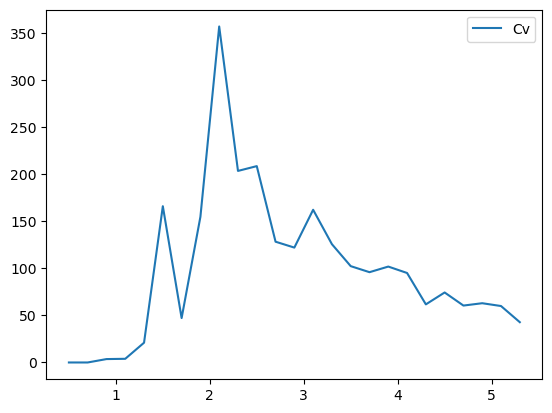

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

ntemp = 25
dT = 0.2
T0 = 0.5
nl = 11
nrun1 = 20000
nrun2 = 20000

spin = np.zeros([nl, nl])
Temp = np.arange(T0, T0+ntemp*dT, dT)
E_T = []
Cv_T = []
M_T = []

def spin_motion(nl, spin, T):
    x = random.randint(0, nl-1)
    y = random.randint(0, nl-1)
    dh = 2*spin[x, y]*(spin[(x+1)%nl, y] + spin[(x-1)%nl, y] + spin[x, (y-1)%nl] + spin[x, (y+1)%nl])
    if dh < 0:
        spin[x, y] *= -1
    else:
        w = np.exp(-dh/T)
        if random.random() < w:
            spin[x, y] *= -1

    return spin

for temp in Temp:
    spin = np.random.choice([-1, 1], size = (nl, nl))
    for run in range(nrun1):
        spin_motion(nl, spin, temp)
    avg_energy = 0
    avg_energy2 = 0
    avg_mag = 0

    for run in range(nrun2):
        spin_motion(nl, spin, temp)
        energy = 0
        mag = 0
        for i in range(nl):
            for j in range(nl):
                energy -= spin[i, j] * (spin[(i+1)%nl, j]+spin[i, (j-1)%nl])
                mag += spin[i, j]
        avg_energy += energy
        avg_energy2 += energy**2
        avg_mag += mag
    avg_energy /= nrun2
    avg_energy2 /= nrun2
    avg_mag /= nrun2
    cv = (avg_energy2 - avg_energy**2) / temp
    E_T.append(avg_energy)
    Cv_T.append(cv)
    M_T.append(avg_mag)

plt.plot(Temp, Cv_T, label='Cv')
plt.legend()
plt.show()









模拟退火优化

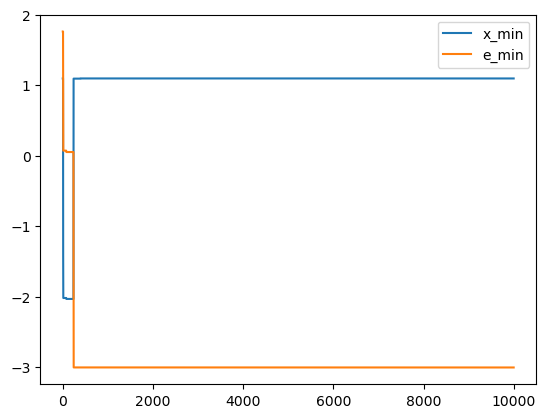

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random

nx = 200
dx = 0.5
nstep = 10000
time = np.arange(nstep)
x1 = -5
x2 = 5
temp_s= 1.2
temp_f = 0.6
temp_space = np.linspace(temp_s, temp_f, nstep)
xx = np.arange(x1, x2, dx)

def v(x):
    return (x - 1)**2 * (x+2) ** 2 - x + 2 * np.sin(10*x)
u = np.array([v(x) for x in xx])

x0 = -1.5
energy0 = v(x0)
energy_min = energy0

emin = []
xmin = []

for step in range(nstep):
    temp = temp_space[step]
    r1 = random.uniform(-1, 1)
    x1 = x0 + dx*r1
    energy1 = v(x1)
    if energy1 < energy0:
        x0, energy0 = x1, energy1
    else:
        r2 = random.random()
        if r2 < np.exp(-(energy1 - energy0) / temp):
            x0, energy0 = x1, energy1

    if energy0 < energy_min:
        energy_min = energy0
        x_min = x0
    emin.append(energy_min)
    xmin.append(x_min)

plt.plot(time, xmin, label='x_min')
plt.plot(time, emin, label='e_min')
plt.legend()
plt.show()








In [115]:
#练习题1
import numpy as np
import random
from scipy.optimize import curve_fit
nl = 11
spins = np.random.choice([1, -1], size=(nl, nl))
nstep = 10000
Temp = np.arange(1.5, 4, 0.1)

def spin_motion(spin, nl, temp):
    for i in range(nl):
        for j in range(nl):
            dh = 2 * spin[i, j] * (spin[(i+1)%nl, j] + spin[(i-1)%nl, j] + spin[i, (j+1)%nl] + spin[i, (j-1)%nl] + H)
            if dh < 0:
                spin[i, j] *= -1
            elif random.random() < np.exp(-dh/temp):
                spin[i, j] *= -1

def mc(H):    
    E_T = []
    E2_T = []
    M_T = []
    M2_T = []
    Mabs_T = []
    Cv_T = []       

    for temp in Temp:
        mag_list = []
        energy_list = []

        for step in range(nstep):
            spin_motion(spin, nl, temp)
            mag = np.sum(spin)
            energy = 0
            for i in range(nl):
                for j in range(nl):
                    energy += - spin[i, j] * (spin[(i+1)%nl, j] + spin[i, (j-1)%nl] + H)
            
            mag_list.append(mag/nl**2)
            energy_list.append(energy/nl**2)

        M_mean = np.mean(mag_list)
        Mabs_mean = np.mean(np.abs(mag_list))
        M2_mean = np.mean([m**2 for m in mag_list])
        E_mean = np.mean(energy_list)
        E2_mean = np.mean([energy**2 for energy in energy_list])
        Cv = (E2_mean - E_mean**2) / (temp**2)
        Chi = (M2_mean - Mabs_mean**2) / temp

        M_T.append(M_mean)
        Mabs_T.append(Mabs_mean)
        M2_T.append(M2_mean)
        E_T.append(E_mean)
        E2_T.append(E2_mean)
        Cv_T.append(Cv)

    return M_T, Cv_T, Chi_T


def find_Tc(Temp, Cv_T):
    max_cv = 0
    for i in range(len(Cv_T)):
        if Cv_T[i] < max_cv:
            max_cv = Cv_T[i]
        else:
            return Temp[i]
    return None

def fit(M_T, Cv_T, Chi_T, Tc):
    mask = Temp < Tc & Temp > Tc - 0.4
    T_fit = Temp[mask]
    M_fit = M_T[mask]
    Cv_fit = Cv_T[mask]
    Chi_fit = Chi_T[mask]

    def fit_func(x, a, b):
        return a * x + b
    
    x, y = np.log(Tc - T_fit) , np.log(M_fit)
    popt, _ = curve_fit(fit_func, x, y)
    beta = popt[1]

    x, y = np.log(Cv_fit), np.log(Tc - T_fit)
    popt, _ = curve_fit(fit_func, x, y)
    alpha = -popt[1]

    x, y = np.log(Chi_fit), np.log(Tc - T_fit)
    popt, _ = curve_fit(fit_func, x, y)
    gamma = -popt[1]



H_list = [0.1]
Tc_list = []

for H in H_list:
    M_T, Cv_T, Chi_T = mc(H)
    Tc = find_Tc(Temp, Cv_T)
    Tc_list.append(Tc)
    plt.plot(Temp, Cv_T)
    
plt.legend()
plt.show()





    




NameError: name 'Chi_T' is not defined

In [ ]:
#练习题2
